# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [4]:
taxi_data = pd.read_csv('/content/yellow_tripdata_2020-01.csv')
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [5]:
taxi_data.shape


(33809, 18)

In [6]:
taxi_data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
33804,2,2020-01-01 02:07:34,2020-01-01 02:12:22,3.0,1.39,1.0,N,74.0,263.0,2.0,6.0,0.5,0.5,0.00,0.0,0.3,9.80,2.5
33805,2,2020-01-01 02:16:56,2020-01-01 02:27:33,2.0,2.29,1.0,N,263.0,142.0,2.0,9.5,0.5,0.5,0.00,0.0,0.3,13.30,2.5
33806,2,2020-01-01 02:46:45,2020-01-01 02:51:50,4.0,1.28,1.0,N,48.0,68.0,1.0,6.5,0.5,0.5,2.06,0.0,0.3,12.36,2.5
33807,2,2020-01-01 02:53:58,2020-01-01 03:06:29,5.0,2.99,1.0,N,90.0,87.0,1.0,11.5,0.5,0.5,3.06,0.0,0.3,18.36,2.5
33808,2,2020-01-01 02:14:5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
taxi_data.dtypes

,0
VendorID,int64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,float64
DOLocationID,float64
payment_type,float64


In [8]:
#convert the pickup and drop to date
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'], errors='coerce')
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'], errors='coerce')

In [9]:
taxi_data['Duration'] = taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Duration
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18


In [10]:
taxi_data['Duration'] = taxi_data['Duration'].dt.total_seconds()/60
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Duration
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [11]:
taxi_data.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime',
                'RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','extra',
                'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge'
                ,'total_amount','congestion_surcharge'],
               axis = 1, inplace = True)

In [12]:
taxi_data.head()


,passenger_count,trip_distance,payment_type,fare_amount,Duration
0,1.0,1.2,1.0,6.0,4.800000
1,1.0,1.2,1.0,7.0,7.416667
2,1.0,0.6,1.0,6.0,6.183333
3,1.0,0.8,1.0,5.5,4.850000
4,1.0,0.0,2.0,3.5,2.300000


In [13]:
taxi_data.isnull().sum()

,0
passenger_count,1
trip_distance,1
payment_type,1
fare_amount,1
Duration,1


In [14]:
taxi_data.dropna(inplace = True)

In [15]:
taxi_data.dtypes

,0
passenger_count,float64
trip_distance,float64
payment_type,float64
fare_amount,float64
Duration,float64


In [16]:
taxi_data['passenger_count']=taxi_data['passenger_count'].astype('int64')

In [17]:
taxi_data['payment_type'] = taxi_data['payment_type'].astype('int64')

In [18]:
taxi_data[taxi_data.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,Duration
2056,1,0.00,2,7.0,0.000000
2441,1,0.00,1,52.0,0.200000
2446,2,1.70,1,9.5,13.066667
2465,1,0.40,1,4.0,3.083333
3344,1,1.20,1,6.0,5.350000
...,...,...,...,...,...
33686,1,3.80,1,16.0,20.250000
33693,1,0.93,1,6.0,6.150000
33719,1,1.40,1,7.5,8.066667
33731,1,0.90,1,5.5,5.800000


In [19]:
taxi_data.drop_duplicates(inplace = True)

In [20]:
taxi_data.shape

(33294, 5)

In [21]:
taxi_data['passenger_count'].value_counts(normalize=True)*100


,proportion
passenger_count,
1,60.185018
2,22.511564
3,6.064156
5,3.835526
4,3.748423
6,2.123506
0,1.528804
8,0.003004


In [22]:
taxi_data['payment_type'].value_counts()

,count
payment_type,
1,23117
2,9850
3,194
4,133


In [23]:
print(taxi_data['payment_type'].value_counts(normalize = True) * 100)

payment_type
1    69.432931
2    29.584910
3     0.582688
4     0.399471
Name: proportion, dtype: float64


In [24]:
taxi_data = taxi_data[taxi_data['payment_type']<3]

In [25]:
taxi_data = taxi_data[(taxi_data['passenger_count']>0)&(taxi_data['passenger_count']<6)]

In [26]:
taxi_data.head()
taxi_data.shape

(31763, 5)

In [27]:
taxi_data['payment_type'].replace([1,2],['card','cash'],inplace=True)
taxi_data.head()

,passenger_count,trip_distance,payment_type,fare_amount,Duration
0,1,1.2,card,6.0,4.800000
1,1,1.2,card,7.0,7.416667
2,1,0.6,card,6.0,6.183333
3,1,0.8,card,5.5,4.850000
4,1,0.0,cash,3.5,2.300000


In [28]:
taxi_data.describe()

,passenger_count,trip_distance,fare_amount,Duration
count,31763.000000,31763.000000,31763.000000,31763.000000
mean,1.637125,2.929184,13.076769,18.603910
std,1.035262,2.877864,10.402872,79.660597
min,1.000000,0.000000,-52.000000,0.000000
25%,1.000000,1.150000,7.000000,7.083333
50%,1.000000,2.040000,10.500000,12.066667
75%,2.000000,3.730000,16.000000,19.141667
max,5.000000,52.300000,300.000000,1439.600000


In [29]:
taxi_data = taxi_data[taxi_data['trip_distance']>0]

In [30]:
taxi_data = taxi_data[taxi_data['fare_amount']>0]
taxi_data = taxi_data[taxi_data['Duration']>0]

In [31]:
taxi_data.describe()

,passenger_count,trip_distance,fare_amount,Duration
count,31457.000000,31457.000000,31457.000000,31457.000000
mean,1.638332,2.956773,12.894358,18.643016
std,1.035765,2.877080,9.589080,79.667173
min,1.000000,0.010000,0.010000,0.033333
25%,1.000000,1.180000,7.000000,7.183333
50%,1.000000,2.070000,10.500000,12.116667
75%,2.000000,3.760000,16.000000,19.133333
max,5.000000,52.300000,300.000000,1439.600000


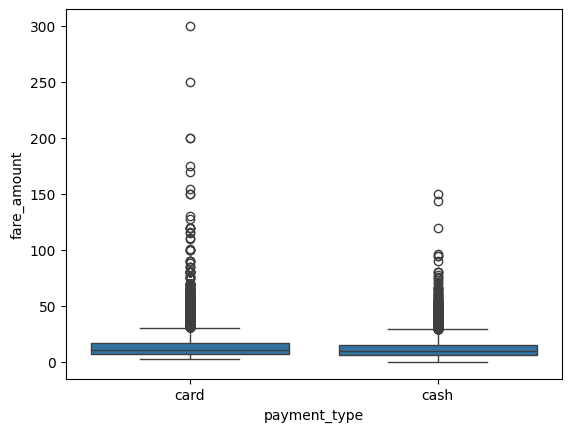

In [32]:
#check for outliers
sns.boxplot(data=taxi_data, y="fare_amount", x="payment_type")
plt.show()

In [35]:
for col in ['trip_distance','fare_amount','Duration']:
    Q1 = taxi_data[col].quantile(0.25)
    Q3 = taxi_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    taxi_data = taxi_data[(taxi_data[col] >= lower_bound) & (taxi_data[col] <= upper_bound)]

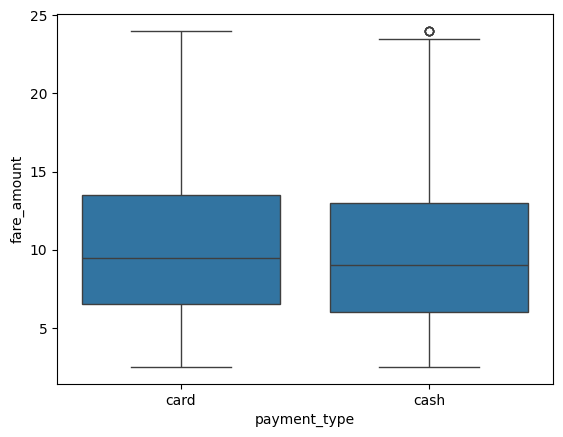

In [36]:
sns.boxplot(data=taxi_data, y="fare_amount", x="payment_type")
plt.show()